# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data


Part 2: Data Inspection, Cleaning and Wrangling in Python

*Mark Bauer*

Table of Contents
=================

   * [Getting Started](#-Getting-Started:-Accessing-the-Building-Footprints-Dataset)
       * [Reading in data as csv in static form](##-Reading-in-data-as-csv-in-static-form)
       
       
   * [1. Importing Libraries](##-1.-Importing-Libraries)

       
   * [2. Reading in data as a pandas dataframe](#-2.-Reading-in-data-as-a-pandas-dataframe)
       
   
   * [3. Data Inspection](#-3.-Data-Inspection)
       * [3.1 Previewing Data](##-3.1-Previewing-Data)
       * [3.2 Calcualting Summary Statistics](##-3.2-Calcualting-Summary-Statistics)
       * [3.3 Identifying Null/NA Values](##-3.3-Identifying-Null/NA-Values)
       
       
   * [4. Analyzing Construction Year Column](#-4.Analyzing-Construction-Year-Column)
       * [4.1 Previewing Column Values](##-4.1-Previewing-Column-Values)
       * [4.2 Filling In Null/NA Values With Median ](##-4.2-Filling-In-Null/NA-Values-With-Median)
       * [4.3 Plotting Histogram of Raw Construction Year Values](##-4.3-Plotting-Histogram-of-Raw-Construction-Year-Values)   
       * [4.4 Identiyfying Values Not Between Years 1 and 2020](##-4.4-Identiyfying-Values-Not-Between-Years-1-and-2020)
       * [4.5 Replacing Values Not Between Years 1 and 2020 with the Median](##-4.5-Replacing-Values-Not-Between-Years-1-and-2020-with-the-Median)
       * [4.6 Plotting Histogram of Construction Years Between 1 and 2020](##-4.6-Plotting-Histogram-of-Construction-Years-Between-1-and-2020)
       * [4.7 Identifying Buildings Built Before 1652 - Possible Outliers](##-4.7-Identifying-Buildings-Built-Before-1652---Possible-Outliers)
       * [4.8 Replacing Values Less Than 1652 with the Median](##-4.8-Replacing-Values-Less-Than-1652-with-the-Median)
       * [4.9 Plotting Histogram of Construction Years with Cleaned Column](##-4.9-Plotting-Histogram-of-Construction-Years-with-Cleaned-Column)
       
       
   * [5. Making a Box Plot](#-5.-Making-a-Box-Plot)
       * [5.1 Calculating Interquartile Range (IQR)](##-5.1-Calculating-Interquartile-Range-(IQR))
       * [5.2 Box Plot of Construction Year Values](##-5.2-Box-Plot-of-Construction-Year-Values)
       * [5.3 Making Histograms of Values Above and Below Box Plot Whiskers](##-5.3-Making-Histograms-of-Values-Above-and-Below-Box-Plot-Whiskers)
       
       
   * [6. Z-Scores](#-6.-Z-Scores)
       * [6.1 Calculating Z-Scores](##-6.1-Calculating-Z-Scores)
       * [6.2 Identifying Possible Outliers from Z-Score](##-6.2-Identifying-Possible-Outliers-from-Z-Score)
       * [6.3 Making Histograms of Construction Year Raw and Normalized (Z-Score) Values](##-6.3-Making-Histograms-of-Construction-Year-Raw-and-Normalized-%29Z-Score%29-Values)    
       
       
   * [7. Conclusion](#-4.-Conclusion)

# Getting Started: Accessing the Building Footprints Dataset

## Reading in data as csv in static form

![building_footprints_csv](images/building-footprints-csv.png)

## Dataset Web Page Link: 
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

## Documentation/Metadata: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt

# to plot matplotlib figures inline on the notebook
%matplotlib inline

In [83]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%load_ext watermark

%watermark -v -p numpy,pandas,matplotlib.pyplot

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib.pyplot 3.0.2


Documention for installing watermark: https://github.com/rasbt/watermark

# 2. Reading in data as a pandas dataframe

In [2]:
# setting the link of our data (a static csv file) as the name 'url'
url = 'https://data.cityofnewyork.us/api/views/jri4-z6fk/rows.csv?accessType=DOWNLOAD'

# reading in our data as a pandas dataframe and setting the name to'building_footprints'
building_footprints = pd.read_csv(url)

# 3. Data Inspection

## 3.1 Previewing Data

In [3]:
# previewing the first five rows of our dataframe
building_footprints.head()

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,NaN,3394646,MULTIPOLYGON (((-73.87129515296562 40.65717370...,2009.0,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3044520815,3.044521e+09,Photogramm
1,NaN,4548330,MULTIPOLYGON (((-73.87670970144625 40.71425234...,1930.0,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4030640041,4.030640e+09,Photogramm
2,NaN,4460479,MULTIPOLYGON (((-73.85195485799383 40.66235471...,1960.0,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4139430001,4.139430e+09,Photogramm
3,NaN,3355684,MULTIPOLYGON (((-73.94029215265738 40.64108287...,1920.0,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3049720006,3.049720e+09,Photogramm
4,NaN,3131737,MULTIPOLYGON (((-73.98998983552244 40.62383804...,1915.0,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3055100055,3.055100e+09,Photogramm


In [4]:
# previewing the last five rows of our dataframe
building_footprints.tail()

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1085003,NaN,4466569,MULTIPOLYGON (((-73.9121168130532 40.558616319...,2015.0,02/28/2020 12:00:00 AM +0000,Constructed,1292197,30.00,2100.0,5.0,989.705264,144.903623,4163500400,NaN,Other (Man
1085004,NaN,3402704,MULTIPOLYGON (((-74.00274089320762 40.60326685...,1935.0,02/28/2020 12:00:00 AM +0000,Constructed,1022376,43.32,2100.0,23.0,1255.926693,151.169385,3064060015,3.064060e+09,Photogramm
1085005,NaN,4465586,MULTIPOLYGON (((-73.92060608518287 40.55654613...,2016.0,02/28/2020 12:00:00 AM +0000,Constructed,1292203,31.00,2100.0,8.0,859.998720,125.999913,4163500400,NaN,Other (Man
1085006,NaN,4466318,MULTIPOLYGON (((-73.91152505298588 40.55855796...,2016.0,02/28/2020 12:00:00 AM +0000,Constructed,1292195,25.00,2100.0,5.0,1118.005687,138.000398,4163500400,NaN,Other (Man
1085007,NaN,4465824,MULTIPOLYGON (((-73.92016884676688 40.55658925...,2014.0,02/28/2020 12:00:00 AM +0000,Constructed,1292201,23.00,2100.0,8.0,859.998720,125.999913,4163500400,NaN,Other (Man


In [5]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_footprints.shape

(1085008, 15)

In [6]:
# printing the columns our dataframe
building_footprints.columns

Index(['NAME', 'BIN', 'the_geom', 'CNSTRCT_YR', 'LSTMODDATE', 'LSTSTATYPE',
       'DOITT_ID', 'HEIGHTROOF', 'FEAT_CODE', 'GROUNDELEV', 'SHAPE_AREA',
       'SHAPE_LEN', 'BASE_BBL', 'MPLUTO_BBL', 'GEOMSOURCE'],
      dtype='object')

In [7]:
# printing the data types of our columns
building_footprints.dtypes

NAME           object
BIN             int64
the_geom       object
CNSTRCT_YR    float64
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE     float64
GROUNDELEV    float64
SHAPE_AREA    float64
SHAPE_LEN     float64
BASE_BBL        int64
MPLUTO_BBL    float64
GEOMSOURCE     object
dtype: object

In [8]:
# printing the column names, non-null counts, and data types of our columns
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085008 entries, 0 to 1085007
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   NAME        1667 non-null     object 
 1   BIN         1085008 non-null  int64  
 2   the_geom    1085008 non-null  object 
 3   CNSTRCT_YR  1080220 non-null  float64
 4   LSTMODDATE  1085008 non-null  object 
 5   LSTSTATYPE  1084828 non-null  object 
 6   DOITT_ID    1085008 non-null  int64  
 7   HEIGHTROOF  1082408 non-null  float64
 8   FEAT_CODE   1084998 non-null  float64
 9   GROUNDELEV  1084492 non-null  float64
 10  SHAPE_AREA  1085008 non-null  float64
 11  SHAPE_LEN   1085008 non-null  float64
 12  BASE_BBL    1085008 non-null  int64  
 13  MPLUTO_BBL  1084738 non-null  float64
 14  GEOMSOURCE  1084794 non-null  object 
dtypes: float64(7), int64(3), object(5)
memory usage: 124.2+ MB


## 3.2 Calcualting Summary Statistics

In [11]:
# printing descriptive statistics of our numeric columns in our data
building_footprints.describe()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.085008e+06,1.080220e+06,1.085008e+06,1.082408e+06,1.084998e+06,1.084492e+06,1.085008e+06,1.085008e+06,1.085008e+06,1.084738e+06
mean,3.709787e+06,3.827875e+03,5.904425e+05,2.753319e+01,2.698869e+03,5.510220e+01,1.596694e+03,1.553044e+02,3.561644e+09,3.561533e+09
std,1.026814e+06,1.950517e+06,3.589073e+05,2.125710e+01,1.202310e+03,4.150305e+01,5.605852e+03,1.271461e+02,9.861019e+08,9.861584e+08
min,1.000000e+06,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.400000e+01,3.247526e+01,2.373699e+01,2.025280e+08,3.049330e+08
25%,3.128414e+06,1.920000e+03,2.863518e+05,1.832000e+01,2.100000e+03,2.500000e+01,6.519905e+02,1.096847e+02,3.043158e+09,3.043130e+09
50%,4.066604e+06,1.930000e+03,5.728505e+05,2.609000e+01,2.100000e+03,4.600000e+01,9.571657e+02,1.379120e+02,4.019100e+09,4.019050e+09
75%,4.481421e+06,1.955000e+03,8.609382e+05,3.109000e+01,2.100000e+03,7.400000e+01,1.320261e+03,1.644520e+02,4.106690e+09,4.106660e+09
max,5.863738e+06,2.027140e+09,1.292204e+06,1.550000e+03,5.110000e+03,5.560000e+02,1.171874e+06,2.001729e+04,6.000000e+09,6.000000e+09


In [13]:
# calculating the median value in each columns
# this can also be found with the describe method above at the 50% index/row
building_footprints.median()

BIN           4.066604e+06
CNSTRCT_YR    1.930000e+03
DOITT_ID      5.728505e+05
HEIGHTROOF    2.609000e+01
FEAT_CODE     2.100000e+03
GROUNDELEV    4.600000e+01
SHAPE_AREA    9.571657e+02
SHAPE_LEN     1.379120e+02
BASE_BBL      4.019100e+09
MPLUTO_BBL    4.019050e+09
dtype: float64

In [14]:
# compute pairwise correlation of columns, excluding NA/null values
building_footprints.corr()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
BIN,1.000000,-0.001463,0.155821,-0.361394,0.190401,0.086595,-0.100992,-0.216071,0.988695,0.988701
CNSTRCT_YR,-0.001463,1.000000,0.001893,0.000701,-0.000486,-0.000018,-0.000251,-0.000787,-0.001477,-0.001477
DOITT_ID,0.155821,0.001893,1.000000,-0.178700,0.552517,-0.016420,-0.038820,-0.161995,0.075403,0.075222
HEIGHTROOF,-0.361394,0.000701,-0.178700,1.000000,-0.365711,-0.000907,0.278586,0.443790,-0.330363,-0.330535
FEAT_CODE,0.190401,-0.000486,0.552517,-0.365711,1.000000,0.001062,-0.107607,-0.311817,0.089307,0.089352
GROUNDELEV,0.086595,-0.000018,-0.016420,-0.000907,0.001062,1.000000,-0.020203,-0.005406,0.105578,0.105702
SHAPE_AREA,-0.100992,-0.000251,-0.038820,0.278586,-0.107607,-0.020203,1.000000,0.784562,-0.095418,-0.095422
SHAPE_LEN,-0.216071,-0.000787,-0.161995,0.443790,-0.311817,-0.005406,0.784562,1.000000,-0.190810,-0.190832
BASE_BBL,0.988695,-0.001477,0.075403,-0.330363,0.089307,0.105578,-0.095418,-0.190810,1.000000,0.999996
MPLUTO_BBL,0.988701,-0.001477,0.075222,-0.330535,0.089352,0.105702,-0.095422,-0.190832,0.999996,1.000000


## 3.3 Identifying Null/NA Values

In [9]:
# printing the number of null/na values in each column
building_footprints.isna().sum()

NAME          1083341
BIN                 0
the_geom            0
CNSTRCT_YR       4788
LSTMODDATE          0
LSTSTATYPE        180
DOITT_ID            0
HEIGHTROOF       2600
FEAT_CODE          10
GROUNDELEV        516
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            0
MPLUTO_BBL        270
GEOMSOURCE        214
dtype: int64

In [10]:
# printing the total amount of null/na values in our data
building_footprints.isnull().sum().sum()

1091919

# 4. Analyzing Construction Year Column

## 4.1 Previewing Column Values

In [16]:
# printing the first five rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints.sort_values('CNSTRCT_YR').head()

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
44681,NaN,4616774,MULTIPOLYGON (((-73.9274033769064 40.748305336...,0.0,09/15/2017 12:00:00 AM +0000,Constructed,1196292,11.633780,2100.0,48.0,1616.206812,206.157167,4002140001,4.002140e+09,Photogramm
280575,NaN,4539899,MULTIPOLYGON (((-73.77534025808143 40.79106041...,0.0,08/22/2017 12:00:00 AM +0000,Constructed,1083007,56.794778,2100.0,44.0,11567.490340,791.240067,4059170001,4.059170e+09,Other (Man
645531,NaN,2128187,MULTIPOLYGON (((-73.80646069542692 40.81322206...,0.0,08/17/2017 12:00:00 AM +0000,Constructed,1204953,10.228529,5110.0,8.0,185.330936,61.462448,2055240213,2.055240e+09,Photogramm
280565,NaN,5162240,MULTIPOLYGON (((-74.14913687374845 40.62913776...,0.0,08/10/2017 12:00:00 AM +0000,Constructed,1219147,9.860000,2100.0,32.0,959.556674,134.430216,5011700020,5.011700e+09,Other (Man
825090,NaN,2117302,MULTIPOLYGON (((-73.93039997378418 40.83255429...,0.0,08/22/2017 12:00:00 AM +0000,Constructed,1044341,11.145684,2100.0,115.0,2962.653682,316.524620,2025240043,2.025240e+09,Other (Man


In [17]:
# printing the first five rows of our data sorted by the 'CNSTRCT_YR' column in descending order
building_footprints.sort_values('CNSTRCT_YR',ascending=False).head()

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
50406,NaN,2127136,MULTIPOLYGON (((-73.89400852220821 40.82339569...,2.027140e+09,01/29/2019 12:00:00 AM +0000,Constructed,1281176,NaN,2100.0,54.0,165.487273,52.567035,2027140030,2.027140e+09,Other (Man
1057891,NaN,5171292,MULTIPOLYGON (((-74.16106976376206 40.58166589...,1.999998e+07,01/22/2019 12:00:00 AM +0000,Constructed,1287742,43.53,2100.0,68.0,347.824676,75.359453,5024500240,5.024508e+09,Other (Man
69921,NaN,5170473,MULTIPOLYGON (((-74.08973477409202 40.60432582...,5.170473e+06,02/22/2018 12:00:00 AM +0000,Constructed,1283952,23.26,2100.0,111.0,680.093732,131.969167,5031700058,5.031700e+09,Other (Man
842037,NaN,5165187,MULTIPOLYGON (((-74.144838646532 40.6162472403...,2.011500e+04,12/05/2019 12:00:00 AM +0000,Constructed,1291251,31.00,2100.0,40.0,1124.997132,139.999793,5004770044,5.004770e+09,Other (Man
518889,NaN,5018663,MULTIPOLYGON (((-74.13682929776881 40.61168969...,2.000400e+04,08/16/2019 12:00:00 AM +0000,Constructed,1288905,28.40,2100.0,89.0,702.366326,127.116855,5007350170,5.007350e+09,Other (Man


In [18]:
# return counts of unique values in descending order of our'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].value_counts()

1920.0    131549
1930.0    113760
1925.0    109764
1950.0     63064
1910.0     53025
           ...  
1793.0         1
1792.0         1
1789.0         1
1775.0         1
20.0           1
Name: CNSTRCT_YR, Length: 261, dtype: int64

In [19]:
# return counts of unique values but sorted by our index - 'CNSTRCT_YR' column values
building_footprints['CNSTRCT_YR'].value_counts().sort_index()

0.000000e+00    6185
2.000000e+00       1
2.000000e+01       1
1.900000e+02       1
2.020000e+02       2
                ... 
2.000400e+04       1
2.011500e+04       1
5.170473e+06       1
1.999998e+07       1
2.027140e+09       1
Name: CNSTRCT_YR, Length: 261, dtype: int64

In [20]:
# summing all the null/na values in our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

4788

In [21]:
# converting all the values in our 'CNSTRCT_YR' column as integers
# invalid conversions will be set as NaN with errors='coerce'
pd.to_numeric(building_footprints['CNSTRCT_YR'], downcast='integer', errors='coerce')

0          2009.0
1          1930.0
2          1960.0
3          1920.0
4          1915.0
            ...  
1085003    2015.0
1085004    1935.0
1085005    2016.0
1085006    2016.0
1085007    2014.0
Name: CNSTRCT_YR, Length: 1085008, dtype: float64

In [22]:
# printing the mean and median of the 'CNSTRCT_YR' column
print(building_footprints['CNSTRCT_YR'].mean())
print(building_footprints['CNSTRCT_YR'].median())

3827.8752189368834
1930.0


## 4.2 Filling In Null/NA Values With Median 

In [23]:
# saving the median of our 'CNSTRCT_YR' as the name 'median'
median = building_footprints['CNSTRCT_YR'].median()

# filling na values in our'CNSTRCT_YR' column with the column's median value
building_footprints["CNSTRCT_YR"] = building_footprints["CNSTRCT_YR"].fillna(value=median)
building_footprints.head()

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,NaN,3394646,MULTIPOLYGON (((-73.87129515296562 40.65717370...,2009.0,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3044520815,3.044521e+09,Photogramm
1,NaN,4548330,MULTIPOLYGON (((-73.87670970144625 40.71425234...,1930.0,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4030640041,4.030640e+09,Photogramm
2,NaN,4460479,MULTIPOLYGON (((-73.85195485799383 40.66235471...,1960.0,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4139430001,4.139430e+09,Photogramm
3,NaN,3355684,MULTIPOLYGON (((-73.94029215265738 40.64108287...,1920.0,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3049720006,3.049720e+09,Photogramm
4,NaN,3131737,MULTIPOLYGON (((-73.98998983552244 40.62383804...,1915.0,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3055100055,3.055100e+09,Photogramm


In [24]:
# summing null/na values in the 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

0

In [25]:
# casting our 'CNSTRCT_YR' column as an integer datatype
building_footprints.astype({'CNSTRCT_YR': 'int32'}).dtypes

NAME           object
BIN             int64
the_geom       object
CNSTRCT_YR      int32
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE     float64
GROUNDELEV    float64
SHAPE_AREA    float64
SHAPE_LEN     float64
BASE_BBL        int64
MPLUTO_BBL    float64
GEOMSOURCE     object
dtype: object

In [26]:
# printing the first five rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints.sort_values('CNSTRCT_YR').head()

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
394182,NaN,4539573,MULTIPOLYGON (((-73.89596912711394 40.77978868...,0.0,07/05/2013 12:00:00 AM +0000,Constructed,1001148,14.590000,2100.0,14.0,1127.535098,143.086325,4007760150,4.007760e+09,Photogramm
79961,NaN,3399930,MULTIPOLYGON (((-73.96670766764721 40.71702090...,0.0,08/10/2017 12:00:00 AM +0000,Constructed,1261862,10.910209,2100.0,15.0,257.454896,84.459384,3023760006,3.023760e+09,Other (Man
79960,NaN,3399929,MULTIPOLYGON (((-73.96639930998293 40.71683555...,0.0,01/01/2015 12:00:00 AM +0000,Constructed,1261737,12.838397,2100.0,15.0,216.922246,70.598581,3023760006,3.023760e+09,Photogramm
730824,NaN,3393069,MULTIPOLYGON (((-74.02180063015784 40.64547125...,0.0,12/07/2018 12:00:00 AM +0000,Constructed,1027453,13.990000,2100.0,31.0,3907.559658,278.682963,3008440030,3.008440e+09,Other (Man
905000,NaN,3405702,MULTIPOLYGON (((-73.87400813130392 40.66302014...,0.0,12/07/2018 12:00:00 AM +0000,Constructed,1258721,22.190639,2100.0,15.0,3608.021997,271.910956,3045220059,3.045220e+09,Photogramm


## 4.3 Plotting Histogram of Raw Construction Year Values

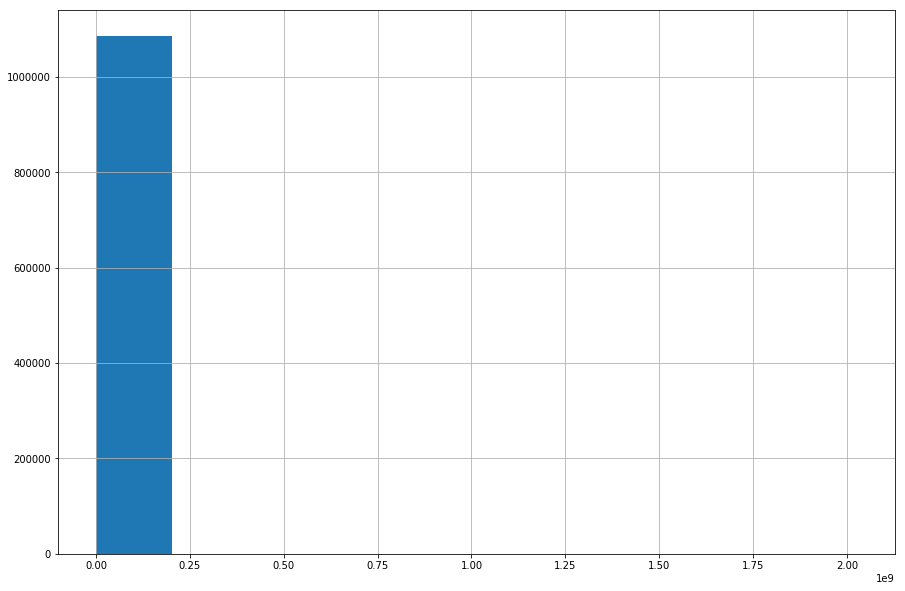

In [27]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(figsize=(15,10))

In [28]:
# printing the max and min values of our CNSTRCT_YR' column
print(building_footprints['CNSTRCT_YR'].max())
print(building_footprints['CNSTRCT_YR'].min())

2027140030.0
0.0


## 4.4 Identiyfying Values Not Between Years 1 and 2020

In [29]:
# previewing the first five rows of values not (i.e. ~) between 1 and 2020 in our data
building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020)].head()

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
50,NaN,3396049,MULTIPOLYGON (((-73.98260213243807 40.66219192...,0.0,12/07/2018 12:00:00 AM +0000,Constructed,1098656,64.34975,2100.0,153.0,5670.027484,339.330474,3011040032,3.011040e+09,Photogramm
74,NaN,3414373,MULTIPOLYGON (((-73.91785278999303 40.70463759...,0.0,12/07/2018 12:00:00 AM +0000,Constructed,1192063,11.01000,5110.0,56.0,153.309666,52.862130,3032490035,3.032490e+09,Photogramm
174,NaN,2098658,MULTIPOLYGON (((-73.88298274971864 40.81517278...,0.0,08/22/2017 12:00:00 AM +0000,Constructed,441521,18.40000,2100.0,23.0,1614.466219,176.130060,2027640025,2.027640e+09,Photogramm
936,NaN,4594704,MULTIPOLYGON (((-73.80705540401291 40.66400343...,0.0,08/22/2017 12:00:00 AM +0000,Constructed,367831,43.10980,2100.0,13.0,12451.758982,692.645592,4119000002,4.119000e+09,Other (Man
997,NaN,3209687,MULTIPOLYGON (((-73.94343801996024 40.62077805...,0.0,12/07/2018 12:00:00 AM +0000,Constructed,801244,27.16000,2100.0,24.0,857.225891,135.011032,3076500020,3.076500e+09,Photogramm


In [30]:
# printing the number of rows and columns of values in 'CNSTRCT_YR' column not between 1 and 2020
building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020, inclusive=True)].shape

(6196, 15)

## 4.5 Replacing Values Not Between Years 1 and 2020 with the Median

In [31]:
# identifying values not between 1 and 2020 and saving as the name 'replace'
replace = building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020)]
# replacing not between 1 and 2020 with the median as the name 'replacement_value'
replacement_value = building_footprints['CNSTRCT_YR'].median()

building_footprints[['CNSTRCT_YR']] = building_footprints[['CNSTRCT_YR']].replace(replace, replacement_value)

In [32]:
# previewing the first five rows of values not (i.e. ~) between 1 and 2020 in our data
building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020)].head()

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE


In [33]:
# printing the number of rows and columns of values in CNSTRCT_YR' column not between 1 and 2020
building_footprints[~building_footprints['CNSTRCT_YR'].between(1, 2020)].shape

(0, 15)

In [34]:
# printing descriptive statistics of our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].describe()

count    1.085008e+06
mean     1.938922e+03
std      2.903169e+01
min      2.000000e+00
25%      1.920000e+03
50%      1.930000e+03
75%      1.955000e+03
max      2.020000e+03
Name: CNSTRCT_YR, dtype: float64

## 4.6 Plotting Histogram of Construction Years Between 1 and 2020

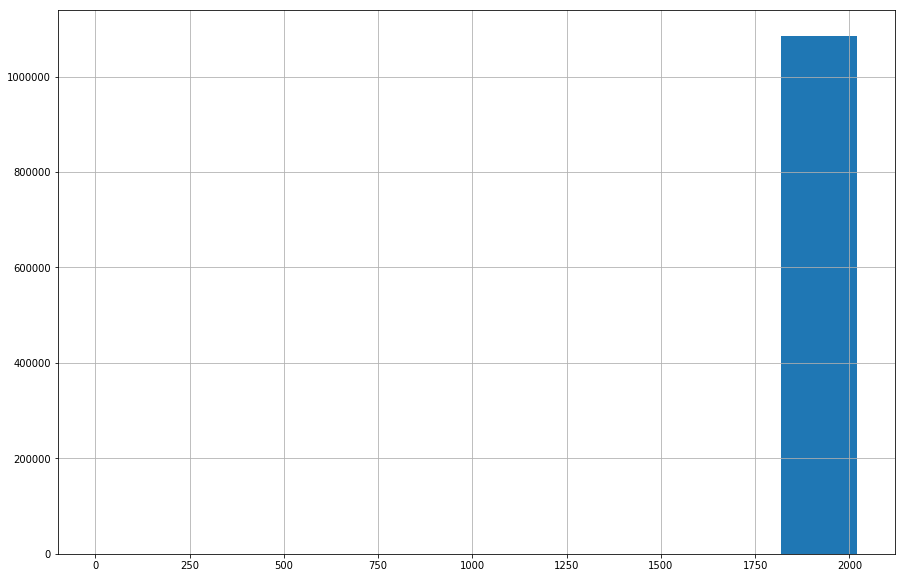

In [35]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(figsize=(15,10))

In [36]:
# printing the first 20 rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints.sort_values('CNSTRCT_YR').head(20)

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
70604,NaN,3055217,MULTIPOLYGON (((-73.95653769904526 40.69124458...,2.0,06/19/2018 12:00:00 AM +0000,Constructed,1285166,NaN,2100.0,NaN,2437.184338,242.849442,3019270060,3.019270e+09,Other (Man
70383,NaN,2129340,MULTIPOLYGON (((-73.90758818710886 40.81335656...,20.0,12/20/2018 12:00:00 AM +0000,Constructed,1283871,NaN,2100.0,39.0,294.262231,73.002191,2026410034,2.026410e+09,Other (Man
1063973,NaN,1090898,MULTIPOLYGON (((-73.94613300522502 40.80422381...,190.0,01/16/2020 12:00:00 AM +0000,Split,1291850,56.920000,2100.0,24.0,1108.007982,150.945562,1017200014,1.017208e+09,Other (Man
1084642,NaN,4467030,MULTIPOLYGON (((-73.92782030992093 40.55560883...,202.0,01/30/2020 12:00:00 AM +0000,Constructed,1291982,25.000000,2100.0,7.0,1430.006313,162.000226,4163500400,NaN,Other (Man
1084990,NaN,4466340,MULTIPOLYGON (((-73.91965038239526 40.55660245...,202.0,02/27/2020 12:00:00 AM +0000,Constructed,1292183,26.000000,2100.0,9.0,860.001316,125.999919,4163500400,NaN,Other (Man
1060263,NaN,3413945,MULTIPOLYGON (((-73.99105552330545 40.66255555...,207.0,01/22/2019 12:00:00 AM +0000,Constructed,1282262,NaN,2100.0,97.0,1564.638130,181.112204,3008790017,3.008798e+09,Other (Man
1061718,NaN,4620030,MULTIPOLYGON (((-73.7955112596261 40.776652524...,208.0,12/05/2019 12:00:00 AM +0000,Constructed,1290850,25.000000,2100.0,89.0,2769.313716,218.043500,4057620048,4.057620e+09,Other (Man
62757,NaN,2129369,MULTIPOLYGON (((-73.89304883809278 40.85420693...,216.0,12/06/2018 12:00:00 AM +0000,Constructed,1287919,45.180000,2100.0,75.0,1757.728743,170.168805,2030500100,2.030500e+09,Other (Man
1080708,Pieter Claesen Wyckoff House,3221967,MULTIPOLYGON (((-73.92083460429942 40.64439765...,1652.0,01/28/2020 12:00:00 AM +0000,Constructed,550741,24.540000,2100.0,14.0,2214.189137,208.884085,3079170009,3.079170e+09,Photogramm
802716,Bowne House,4113403,MULTIPOLYGON (((-73.8247828135812 40.762948467...,1661.0,08/22/2017 12:00:00 AM +0000,Constructed,776399,26.120000,2100.0,64.0,2814.439349,242.381274,4050130006,4.050130e+09,Photogramm


## 4.7 Identifying Buildings Built Before 1652 - Possible Outliers

In [37]:
# returning the rows of which  the 'CNSTRCT_YR' is less than 1652
# I am using '1652' because this ism most likely the oldest building in this dataset 
building_footprints[building_footprints['CNSTRCT_YR'] < 1652]

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
62757,NaN,2129369,MULTIPOLYGON (((-73.89304883809278 40.85420693...,216.0,12/06/2018 12:00:00 AM +0000,Constructed,1287919,45.18,2100.0,75.0,1757.728743,170.168805,2030500100,2.030500e+09,Other (Man
70383,NaN,2129340,MULTIPOLYGON (((-73.90758818710886 40.81335656...,20.0,12/20/2018 12:00:00 AM +0000,Constructed,1283871,NaN,2100.0,39.0,294.262231,73.002191,2026410034,2.026410e+09,Other (Man
70604,NaN,3055217,MULTIPOLYGON (((-73.95653769904526 40.69124458...,2.0,06/19/2018 12:00:00 AM +0000,Constructed,1285166,NaN,2100.0,NaN,2437.184338,242.849442,3019270060,3.019270e+09,Other (Man
1060263,NaN,3413945,MULTIPOLYGON (((-73.99105552330545 40.66255555...,207.0,01/22/2019 12:00:00 AM +0000,Constructed,1282262,NaN,2100.0,97.0,1564.638130,181.112204,3008790017,3.008798e+09,Other (Man
1061718,NaN,4620030,MULTIPOLYGON (((-73.7955112596261 40.776652524...,208.0,12/05/2019 12:00:00 AM +0000,Constructed,1290850,25.00,2100.0,89.0,2769.313716,218.043500,4057620048,4.057620e+09,Other (Man
1063973,NaN,1090898,MULTIPOLYGON (((-73.94613300522502 40.80422381...,190.0,01/16/2020 12:00:00 AM +0000,Split,1291850,56.92,2100.0,24.0,1108.007982,150.945562,1017200014,1.017208e+09,Other (Man
1084642,NaN,4467030,MULTIPOLYGON (((-73.92782030992093 40.55560883...,202.0,01/30/2020 12:00:00 AM +0000,Constructed,1291982,25.00,2100.0,7.0,1430.006313,162.000226,4163500400,NaN,Other (Man
1084990,NaN,4466340,MULTIPOLYGON (((-73.91965038239526 40.55660245...,202.0,02/27/2020 12:00:00 AM +0000,Constructed,1292183,26.00,2100.0,9.0,860.001316,125.999919,4163500400,NaN,Other (Man


In [38]:
# printing the median of the 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].median()

1930.0

## 4.8 Replacing Values Less Than 1652 with the Median

In [39]:
# identifying values less than 1652 to be replaced as the name 'replace'
replace = building_footprints[building_footprints['CNSTRCT_YR'] < 1652]
# saving the median as the name 'replacement_value' 
replacement_value = building_footprints['CNSTRCT_YR'].median()

# replacing these values with the column's median 
building_footprints[['CNSTRCT_YR']] = building_footprints[['CNSTRCT_YR']].replace(replace, replacement_value)

In [40]:
# performing a sanity check and looking at the first record (i.e. 62757) of our data and see if the old value
# of 216 has been replaced with 1930
building_footprints.loc[62757].head()

NAME                                                        NaN
BIN                                                     2129369
the_geom      MULTIPOLYGON (((-73.89304883809278 40.85420693...
CNSTRCT_YR                                                 1930
LSTMODDATE                         12/06/2018 12:00:00 AM +0000
Name: 62757, dtype: object

In [41]:
# printing the first 5 rows of our data sorted by the 'CNSTRCT_YR' column in ascending order
building_footprints.sort_values('CNSTRCT_YR').head()

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1080708,Pieter Claesen Wyckoff House,3221967,MULTIPOLYGON (((-73.92083460429942 40.64439765...,1652.0,01/28/2020 12:00:00 AM +0000,Constructed,550741,24.540000,2100.0,14.0,2214.189137,208.884085,3079170009,3.079170e+09,Photogramm
483669,NaN,4610542,MULTIPOLYGON (((-73.82449114078894 40.76279389...,1661.0,08/17/2017 12:00:00 AM +0000,Constructed,1190137,14.846959,5110.0,63.0,571.057794,112.944873,4050130006,4.050130e+09,Photogramm
802716,Bowne House,4113403,MULTIPOLYGON (((-73.8247828135812 40.762948467...,1661.0,08/22/2017 12:00:00 AM +0000,Constructed,776399,26.120000,2100.0,64.0,2814.439349,242.381274,4050130006,4.050130e+09,Photogramm
965929,NaN,5130548,MULTIPOLYGON (((-74.06383185277687 40.61463876...,1665.0,08/22/2017 12:00:00 AM +0000,Constructed,160094,32.570000,2100.0,38.0,3580.967750,308.578271,5028300049,5.028300e+09,Photogramm
581993,NaN,5042188,MULTIPOLYGON (((-74.06293248238293 40.61512359...,1665.0,08/22/2017 12:00:00 AM +0000,Constructed,806241,22.260000,2100.0,21.0,2643.246683,249.017591,5028300049,5.028300e+09,Photogramm


In [42]:
# printing the first 5 rows of our data sorted by the 'CNSTRCT_YR' column in descending order
building_footprints.sort_values('CNSTRCT_YR',ascending=False).head()

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
1084661,NaN,4619933,MULTIPOLYGON (((-73.81187373959625 40.70347945...,2020.0,02/05/2020 12:00:00 AM +0000,Constructed,1292015,30.0,2100.0,61.0,600.760926,99.095073,4096830014,NaN,Other (Man
1063160,NaN,3424372,MULTIPOLYGON (((-73.96302281475309 40.70706394...,2020.0,01/22/2020 12:00:00 AM +0000,Marked for Construction,1291716,55.0,5100.0,49.0,1464.982516,170.577405,3021690146,3.021690e+09,Other (Man
1084752,NaN,4614976,MULTIPOLYGON (((-73.78530980302601 40.59575762...,2020.0,02/12/2020 12:00:00 AM +0000,Constructed,1292080,16.0,1004.0,16.0,2825.406305,212.625373,4160020001,NaN,Other (Man
1084751,NaN,5171428,MULTIPOLYGON (((-74.07704173115835 40.61149756...,2020.0,02/12/2020 12:00:00 AM +0000,Marked for Construction,1292069,31.0,5100.0,72.0,1058.940021,150.090206,5029890005,NaN,Other (Man
1084749,NaN,4614969,MULTIPOLYGON (((-73.7834870763709 40.596820439...,2020.0,02/12/2020 12:00:00 AM +0000,Constructed,1292071,16.0,1004.0,11.0,2219.652396,189.025239,4160010002,NaN,Other (Man


## 4.9 Plotting Histogram of Construction Years with Cleaned Column

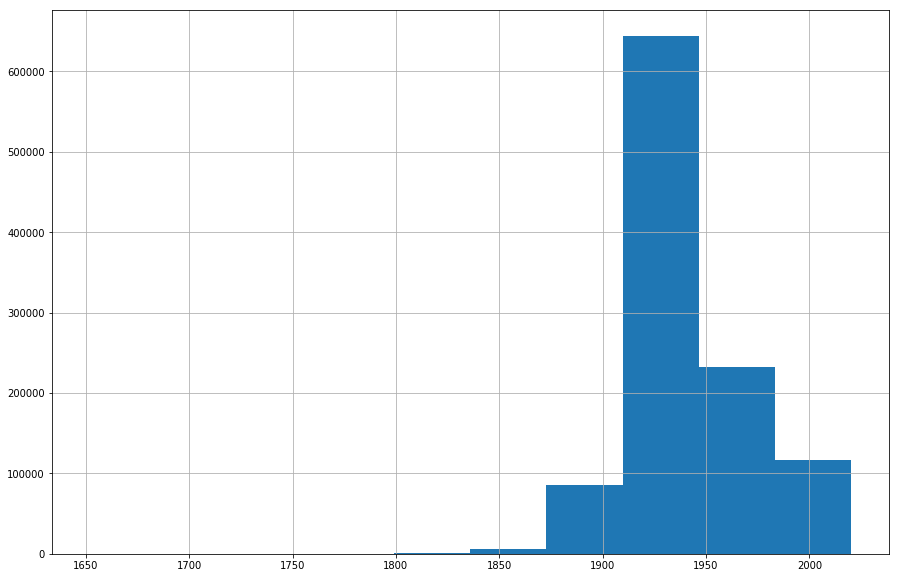

In [43]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(figsize=(15,10))

In [44]:
# printing descriptive statistics of our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].describe()

count    1.085008e+06
mean     1.938935e+03
std      2.862422e+01
min      1.652000e+03
25%      1.920000e+03
50%      1.930000e+03
75%      1.955000e+03
max      2.020000e+03
Name: CNSTRCT_YR, dtype: float64

In [45]:
# return counts of unique values in descending order of our'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].value_counts()

1920.0    131549
1930.0    124752
1925.0    109764
1950.0     63064
1910.0     53025
           ...  
1795.0         1
1797.0         1
1809.0         1
1811.0         1
1652.0         1
Name: CNSTRCT_YR, Length: 244, dtype: int64

In [46]:
# return counts of unique values of our 'CNSTRCT_YR' column sorted by 'CNSTRCT_YR'
building_footprints['CNSTRCT_YR'].value_counts().sort_index()

1652.0       1
1661.0       2
1665.0       2
1694.0       1
1706.0       2
          ... 
2016.0    1715
2017.0    1824
2018.0    1972
2019.0     687
2020.0      57
Name: CNSTRCT_YR, Length: 244, dtype: int64

In [47]:
# summing null/na values in our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR'].isna().sum()

0

In [48]:
# printing descriptive statistics of our data 
building_footprints.describe()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.085008e+06,1.085008e+06,1.085008e+06,1.082408e+06,1.084998e+06,1.084492e+06,1.085008e+06,1.085008e+06,1.085008e+06,1.084738e+06
mean,3.709787e+06,1.938935e+03,5.904425e+05,2.753319e+01,2.698869e+03,5.510220e+01,1.596694e+03,1.553044e+02,3.561644e+09,3.561533e+09
std,1.026814e+06,2.862422e+01,3.589073e+05,2.125710e+01,1.202310e+03,4.150305e+01,5.605852e+03,1.271461e+02,9.861019e+08,9.861584e+08
min,1.000000e+06,1.652000e+03,1.000000e+00,0.000000e+00,0.000000e+00,-1.400000e+01,3.247526e+01,2.373699e+01,2.025280e+08,3.049330e+08
25%,3.128414e+06,1.920000e+03,2.863518e+05,1.832000e+01,2.100000e+03,2.500000e+01,6.519905e+02,1.096847e+02,3.043158e+09,3.043130e+09
50%,4.066604e+06,1.930000e+03,5.728505e+05,2.609000e+01,2.100000e+03,4.600000e+01,9.571657e+02,1.379120e+02,4.019100e+09,4.019050e+09
75%,4.481421e+06,1.955000e+03,8.609382e+05,3.109000e+01,2.100000e+03,7.400000e+01,1.320261e+03,1.644520e+02,4.106690e+09,4.106660e+09
max,5.863738e+06,2.020000e+03,1.292204e+06,1.550000e+03,5.110000e+03,5.560000e+02,1.171874e+06,2.001729e+04,6.000000e+09,6.000000e+09


In [49]:
# printing the null/na values of each column in our data
building_footprints.isna().sum()

NAME          1083341
BIN                 0
the_geom            0
CNSTRCT_YR          0
LSTMODDATE          0
LSTSTATYPE        180
DOITT_ID            0
HEIGHTROOF       2600
FEAT_CODE          10
GROUNDELEV        516
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            0
MPLUTO_BBL        270
GEOMSOURCE        214
dtype: int64

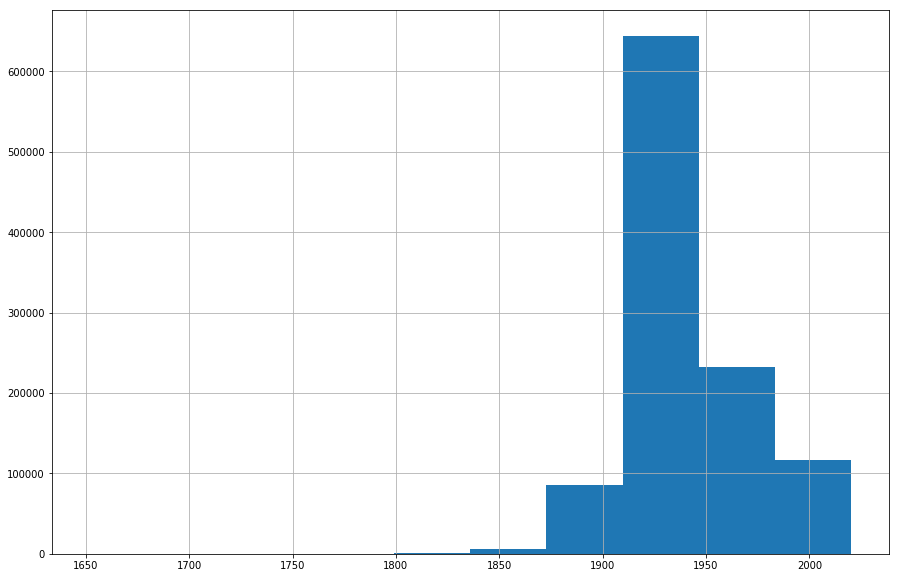

In [50]:
# making a histogram of our 'CNSTRCT_YR' column with 10 bins
building_footprints['CNSTRCT_YR'].hist(bins=10, figsize=(15,10))

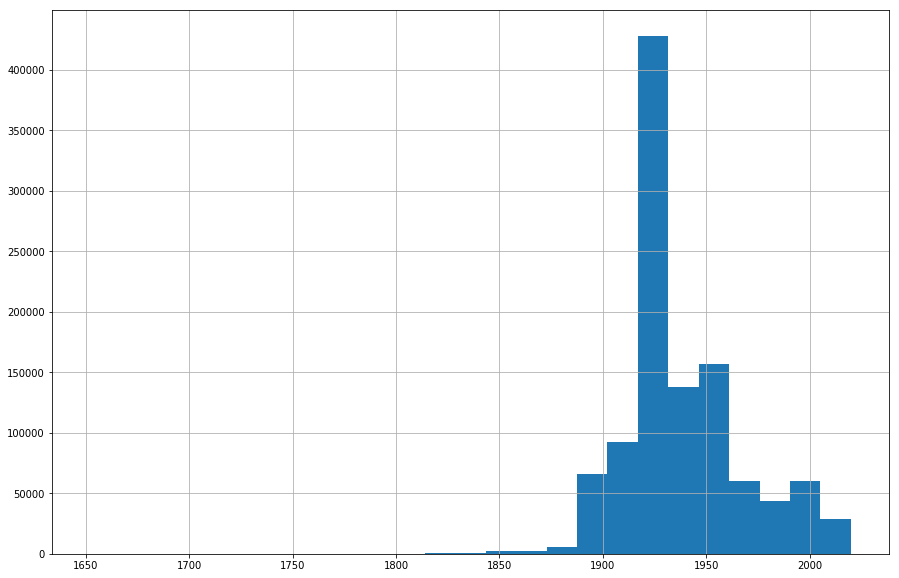

In [51]:
# making a histogram of our 'CNSTRCT_YR' column with 25 bins
building_footprints['CNSTRCT_YR'].hist(bins=25, figsize=(15,10))

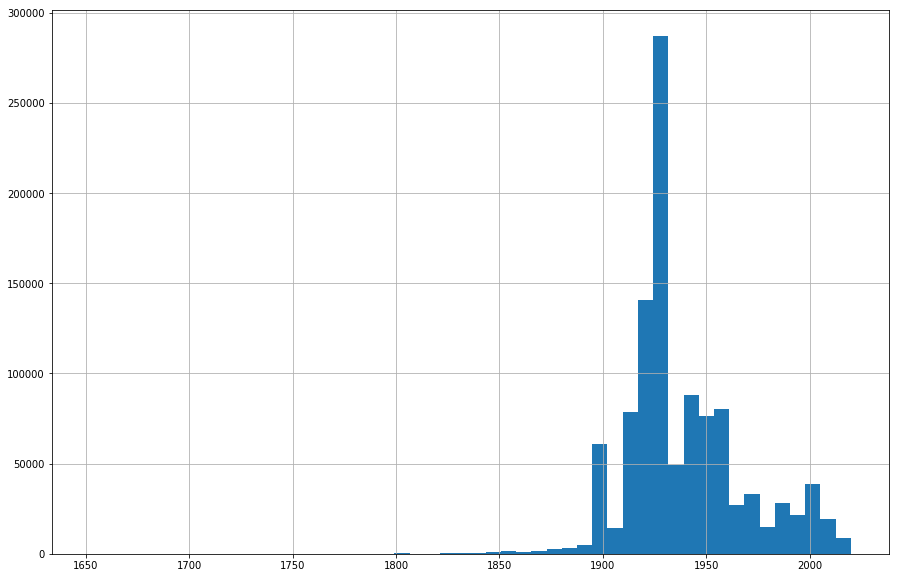

In [52]:
# making a histogram of our 'CNSTRCT_YR' column with 50 bins
building_footprints['CNSTRCT_YR'].hist(bins=50, figsize=(15,10))

In [53]:
# printing mean and median of our 'CNSTRCT_YR' column
print(building_footprints['CNSTRCT_YR'].mean())
print(building_footprints['CNSTRCT_YR'].median())

1938.9350447185643
1930.0


# 5. Making a Box Plot

## 5.1 Calculating Interquartile Range (IQR)

In [54]:
# printing the 25% and 75% quantiles of our 'CNSTRCT_YR' column
print(building_footprints['CNSTRCT_YR'].quantile(0.25))
print(building_footprints['CNSTRCT_YR'].quantile(0.75))

1920.0
1955.0


In [55]:
# saving the 25% (i.e. Q1) and 75% (i.e. Q3) quantiles of our 'CNSTRCT_YR' column
Q1 = building_footprints['CNSTRCT_YR'].quantile(0.25)
Q3 = building_footprints['CNSTRCT_YR'].quantile(0.75)

# Computing the interquartile range (IQR)
IQR = Q3 - Q1

In [56]:
# printing the IQR of our 'CNSTRCT_YR' column
IQR

35.0

In [57]:
# printing the lower 1.5*IQR whisker = Q1 - 1.5 * IQR
print((Q1 - 1.5 * IQR))

# printing the upper 1.5*IQR whisker = Q1 - 1.5 * IQR
print((Q3 + 1.5 * IQR))

1867.5
2007.5


## 5.2 Box Plot of Construction Year Values

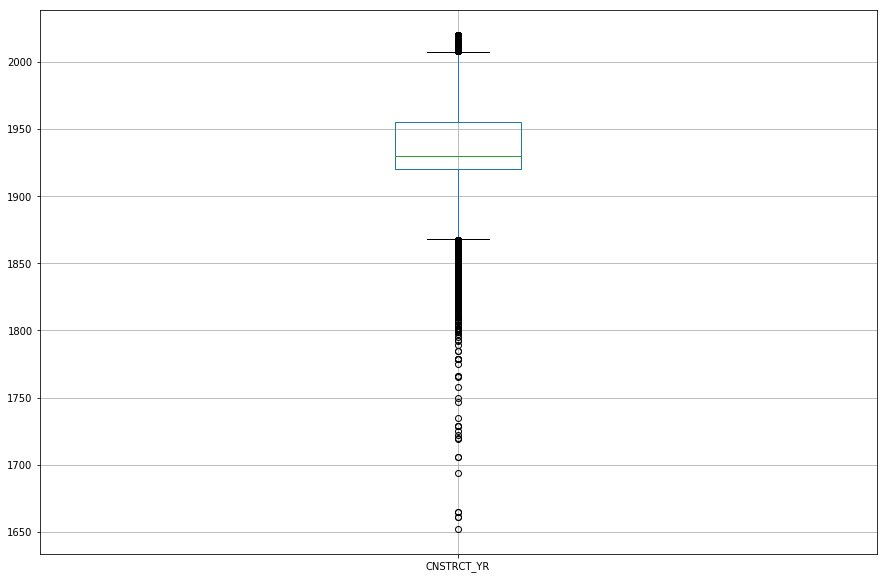

In [58]:
# making a box plot from our 'CNSTRCT_YR' column
CNSTRCT_YR_boxplot = building_footprints.boxplot(column=['CNSTRCT_YR'], figsize=(15,10))

## 5.3 Making Histograms of Values Above and Below Box Plot Whiskers

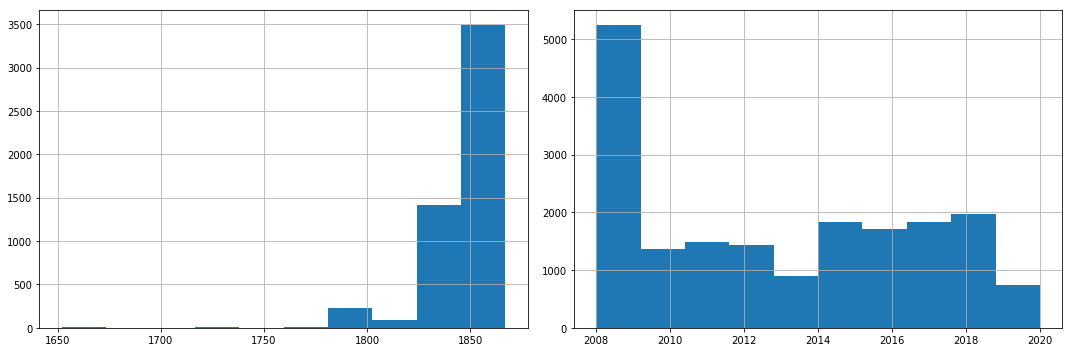

In [59]:
plt.figure(figsize=(15,5))

# identifying values lower than our lower whisker
floor = building_footprints[building_footprints.CNSTRCT_YR < (Q1 - 1.5 * IQR)] 

# identifying values higher than our upper whisker
ceiling = building_footprints[building_footprints.CNSTRCT_YR > (Q3 + 1.5 * IQR)]

#making histograms of these distributions
plt.subplot(121)
floor['CNSTRCT_YR'].hist()

plt.subplot(122)
ceiling['CNSTRCT_YR'].hist()

plt.tight_layout()

In [60]:
# return counts of unique values in descending order lower than our lower whisker
floor['CNSTRCT_YR'].value_counts()

1855.0    269
1850.0    260
1853.0    248
1854.0    241
1860.0    229
         ... 
1747.0      1
1694.0      1
1735.0      1
1797.0      1
1775.0      1
Name: CNSTRCT_YR, Length: 91, dtype: int64

In [61]:
# return counts of unique values lower than our lower whisker sorted by index (i.e. 'CNSTRCT_YR')
floor['CNSTRCT_YR'].value_counts().sort_index()

1652.0      1
1661.0      2
1665.0      2
1694.0      1
1706.0      2
         ... 
1863.0     67
1864.0    108
1865.0    141
1866.0    152
1867.0    174
Name: CNSTRCT_YR, Length: 91, dtype: int64

In [62]:
# printing the unique values lower than our lower whisker
floor['CNSTRCT_YR'].sort_values().unique()

array([1652., 1661., 1665., 1694., 1706., 1719., 1720., 1722., 1725.,
       1729., 1735., 1747., 1750., 1758., 1765., 1766., 1775., 1779.,
       1785., 1789., 1792., 1793., 1795., 1797., 1799., 1800., 1801.,
       1802., 1803., 1804., 1807., 1808., 1809., 1810., 1811., 1812.,
       1813., 1814., 1815., 1816., 1817., 1818., 1819., 1820., 1821.,
       1822., 1823., 1824., 1825., 1826., 1827., 1828., 1829., 1830.,
       1831., 1832., 1833., 1834., 1835., 1836., 1837., 1838., 1839.,
       1840., 1841., 1842., 1843., 1844., 1845., 1846., 1847., 1848.,
       1849., 1850., 1851., 1852., 1853., 1854., 1855., 1856., 1857.,
       1858., 1859., 1860., 1861., 1862., 1863., 1864., 1865., 1866.,
       1867.])

In [63]:
# return counts of unique values in descending order greater than our upper whisker
ceiling['CNSTRCT_YR'].value_counts()

2008.0    3289
2018.0    1972
2009.0    1955
2017.0    1824
2016.0    1715
2011.0    1487
2012.0    1428
2010.0    1365
2015.0    1006
2013.0     895
2014.0     823
2019.0     687
2020.0      57
Name: CNSTRCT_YR, dtype: int64

In [64]:
# previewing first five rows of our data
building_footprints.head()

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE
0,NaN,3394646,MULTIPOLYGON (((-73.87129515296562 40.65717370...,2009.0,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3044520815,3.044521e+09,Photogramm
1,NaN,4548330,MULTIPOLYGON (((-73.87670970144625 40.71425234...,1930.0,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4030640041,4.030640e+09,Photogramm
2,NaN,4460479,MULTIPOLYGON (((-73.85195485799383 40.66235471...,1960.0,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4139430001,4.139430e+09,Photogramm
3,NaN,3355684,MULTIPOLYGON (((-73.94029215265738 40.64108287...,1920.0,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3049720006,3.049720e+09,Photogramm
4,NaN,3131737,MULTIPOLYGON (((-73.98998983552244 40.62383804...,1915.0,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3055100055,3.055100e+09,Photogramm


# 6. Z-Scores

## 6.1 Calculating Z-Scores

In [65]:
# calculating the z score of our 'CNSTRCT_YR' column
building_footprints['CNSTRCT_YR_zscore'] = (building_footprints.CNSTRCT_YR - building_footprints.CNSTRCT_YR.mean())/building_footprints.CNSTRCT_YR.std()

In [66]:
# making a separate dataframe with only the columns ['CNSTRCT_YR', 'CNSTRCT_YR_zscore']
CNSTRCT_YR_zscore = building_footprints[['CNSTRCT_YR', 'CNSTRCT_YR_zscore']]
CNSTRCT_YR_zscore.head()

,CNSTRCT_YR,CNSTRCT_YR_zscore
0,2009.0,2.447751
1,1930.0,-0.312150
2,1960.0,0.735914
3,1920.0,-0.661504
4,1915.0,-0.836182


In [67]:
# sorting by CNSTRCT_YR_zscore in ascending order
CNSTRCT_YR_zscore.sort_values(by='CNSTRCT_YR_zscore')

,CNSTRCT_YR,CNSTRCT_YR_zscore
1080708,1652.0,-10.024206
483669,1661.0,-9.709787
802716,1661.0,-9.709787
965929,1665.0,-9.570045
581993,1665.0,-9.570045
...,...,...
1084580,2020.0,2.832041
1084699,2020.0,2.832041
1084584,2020.0,2.832041
1063276,2020.0,2.832041


In [68]:
# sorting by CNSTRCT_YR_zscore in descending order
CNSTRCT_YR_zscore.sort_values(by='CNSTRCT_YR_zscore', ascending=False)

,CNSTRCT_YR,CNSTRCT_YR_zscore
1084661,2020.0,2.832041
1063160,2020.0,2.832041
1084752,2020.0,2.832041
1084751,2020.0,2.832041
1084749,2020.0,2.832041
...,...,...
965929,1665.0,-9.570045
581993,1665.0,-9.570045
483669,1661.0,-9.709787
802716,1661.0,-9.709787


In [69]:
len(CNSTRCT_YR_zscore)

1085008

In [70]:
CNSTRCT_YR_zscore.dtypes

CNSTRCT_YR           float64
CNSTRCT_YR_zscore    float64
dtype: object

## 6.2 Identifying Possible Outliers from Z-Score

In [71]:
# returning values in 'CNSTRCT_YR_zscore' column not between -3 and 3
outside_zscore = CNSTRCT_YR_zscore[~CNSTRCT_YR_zscore['CNSTRCT_YR_zscore'].between(-3, 3, inclusive=True)]

In [72]:
# previewing first five rows 
outside_zscore.head()

,CNSTRCT_YR,CNSTRCT_YR_zscore
3249,1843.0,-3.351534
6672,1850.0,-3.106986
8437,1853.0,-3.002180
9206,1850.0,-3.106986
11136,1850.0,-3.106986


In [73]:
# previewing first five rows 
outside_zscore.head()

,CNSTRCT_YR,CNSTRCT_YR_zscore
3249,1843.0,-3.351534
6672,1850.0,-3.106986
8437,1853.0,-3.002180
9206,1850.0,-3.106986
11136,1850.0,-3.106986


In [74]:
# sorting values in 'CNSTRCT_YR_zscore' in ascending order
outside_zscore.sort_values(by='CNSTRCT_YR_zscore')

,CNSTRCT_YR,CNSTRCT_YR_zscore
1080708,1652.0,-10.024206
483669,1661.0,-9.709787
802716,1661.0,-9.709787
965929,1665.0,-9.570045
581993,1665.0,-9.570045
...,...,...
1067455,1853.0,-3.002180
1067495,1853.0,-3.002180
1079601,1853.0,-3.002180
1080056,1853.0,-3.002180


In [75]:
# sorting values in 'CNSTRCT_YR_zscore' in descending order
outside_zscore.sort_values(by='CNSTRCT_YR_zscore', ascending=False)

,CNSTRCT_YR,CNSTRCT_YR_zscore
1067455,1853.0,-3.002180
1080963,1853.0,-3.002180
1066337,1853.0,-3.002180
1066460,1853.0,-3.002180
1084013,1853.0,-3.002180
...,...,...
581993,1665.0,-9.570045
965929,1665.0,-9.570045
802716,1661.0,-9.709787
483669,1661.0,-9.709787


In [76]:
# printing number of rows
len(outside_zscore)

3173

## 6.3 Making Histograms of Construction Year Raw and Normalized (Z-Score) Values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2371e240>,
      dtype=object)

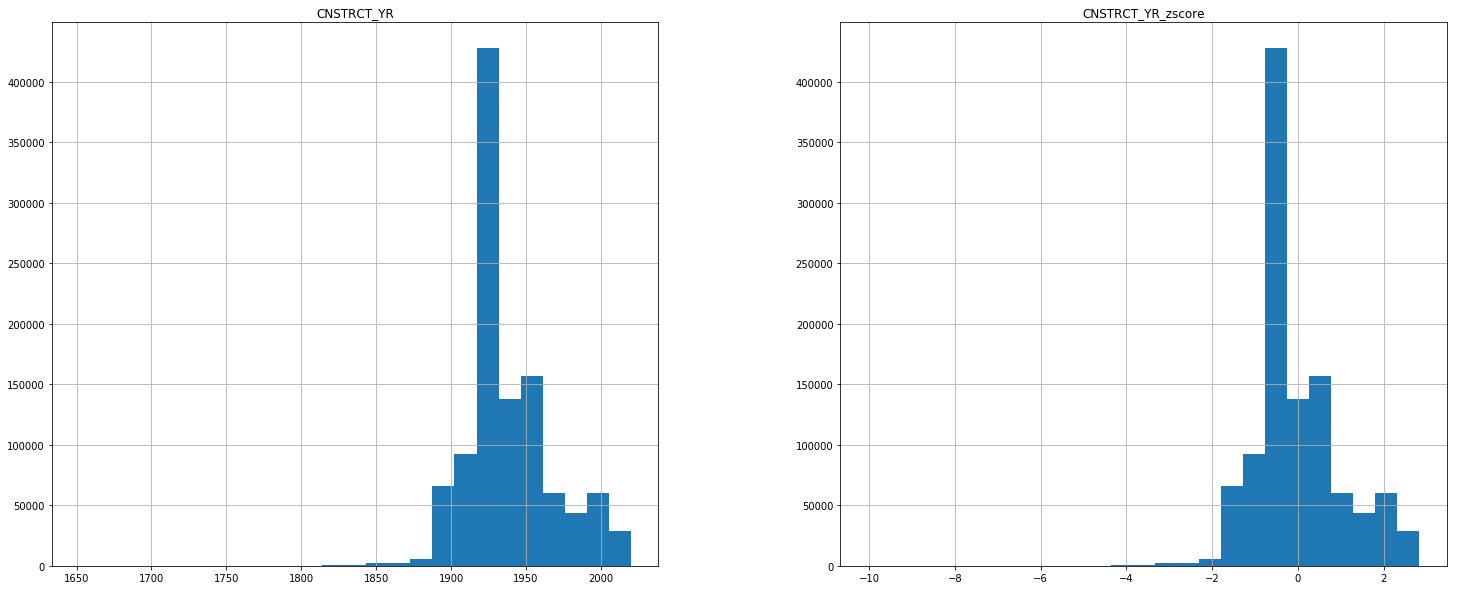

In [77]:
# making histograms of the distributions of both columns
CNSTRCT_YR_zscore.hist(bins=25, figsize=(25,10))

In [78]:
# previewing the first five rows of entire dataframe
building_footprints.head()

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,CNSTRCT_YR_zscore
0,NaN,3394646,MULTIPOLYGON (((-73.87129515296562 40.65717370...,2009.0,08/22/2017 12:00:00 AM +0000,Constructed,1212853,21.608508,2100.0,18.0,854.662433,125.079796,3044520815,3.044521e+09,Photogramm,2.447751
1,NaN,4548330,MULTIPOLYGON (((-73.87670970144625 40.71425234...,1930.0,08/17/2017 12:00:00 AM +0000,Constructed,1226227,10.360000,5110.0,122.0,217.594243,60.225858,4030640041,4.030640e+09,Photogramm,-0.312150
2,NaN,4460479,MULTIPOLYGON (((-73.85195485799383 40.66235471...,1960.0,08/22/2017 12:00:00 AM +0000,Constructed,581946,29.811570,2100.0,10.0,946.427476,123.141941,4139430001,4.139430e+09,Photogramm,0.735914
3,NaN,3355684,MULTIPOLYGON (((-73.94029215265738 40.64108287...,1920.0,08/17/2017 12:00:00 AM +0000,Constructed,858061,11.200000,5110.0,32.0,248.678169,63.940817,3049720006,3.049720e+09,Photogramm,-0.661504
4,NaN,3131737,MULTIPOLYGON (((-73.98998983552244 40.62383804...,1915.0,08/22/2017 12:00:00 AM +0000,Constructed,568078,24.980000,2100.0,44.0,1163.227669,165.608763,3055100055,3.055100e+09,Photogramm,-0.836182


In [79]:
# previewing the last five rows of entire dataframe
building_footprints.tail()

,NAME,BIN,the_geom,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,CNSTRCT_YR_zscore
1085003,NaN,4466569,MULTIPOLYGON (((-73.9121168130532 40.558616319...,2015.0,02/28/2020 12:00:00 AM +0000,Constructed,1292197,30.00,2100.0,5.0,989.705264,144.903623,4163500400,NaN,Other (Man,2.657364
1085004,NaN,3402704,MULTIPOLYGON (((-74.00274089320762 40.60326685...,1935.0,02/28/2020 12:00:00 AM +0000,Constructed,1022376,43.32,2100.0,23.0,1255.926693,151.169385,3064060015,3.064060e+09,Photogramm,-0.137473
1085005,NaN,4465586,MULTIPOLYGON (((-73.92060608518287 40.55654613...,2016.0,02/28/2020 12:00:00 AM +0000,Constructed,1292203,31.00,2100.0,8.0,859.998720,125.999913,4163500400,NaN,Other (Man,2.692299
1085006,NaN,4466318,MULTIPOLYGON (((-73.91152505298588 40.55855796...,2016.0,02/28/2020 12:00:00 AM +0000,Constructed,1292195,25.00,2100.0,5.0,1118.005687,138.000398,4163500400,NaN,Other (Man,2.692299
1085007,NaN,4465824,MULTIPOLYGON (((-73.92016884676688 40.55658925...,2014.0,02/28/2020 12:00:00 AM +0000,Constructed,1292201,23.00,2100.0,8.0,859.998720,125.999913,4163500400,NaN,Other (Man,2.622428


In [80]:
# printing the dimensions (i.e. rows, columns) of entire dataframe
building_footprints.shape

(1085008, 16)

# 7. Conclusion